# TechnoHacks Task 2

# Classify Iris Flowers

### Import Libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

### Load and Explore Dataset

In [66]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('/content/iris.data', names=names)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


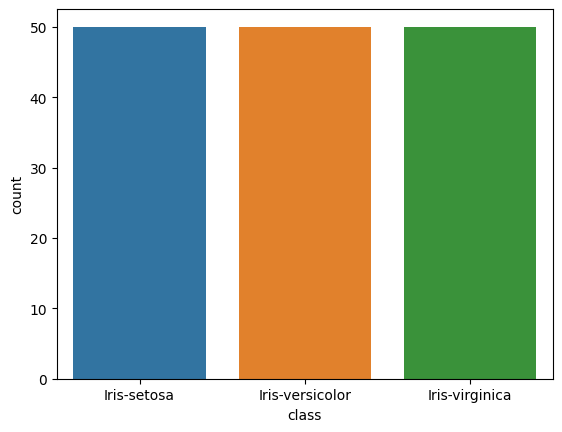

In [68]:
sns.countplot(x='class', data=df)
plt.show()

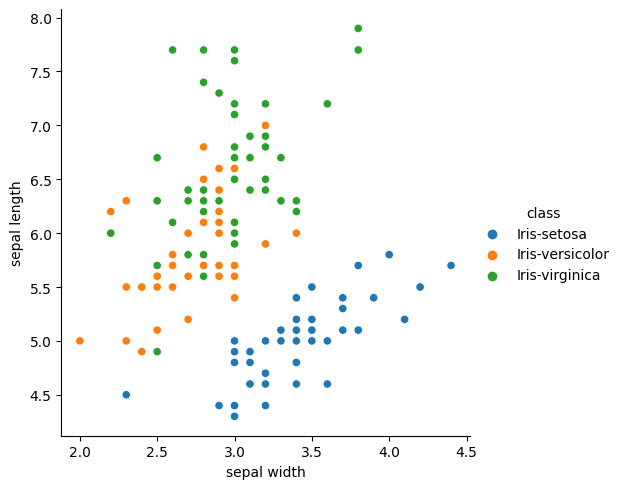

In [69]:
sns.relplot(df, x='sepal width', y='sepal length', hue='class')
plt.show()

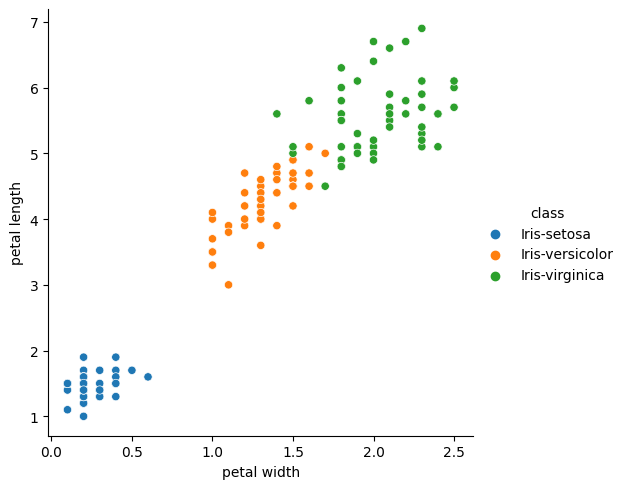

In [70]:
sns.relplot(df, x='petal width', y='petal length', hue='class')
plt.show()

### Transform Labels and Split Data

In [202]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df['class'].unique()

array([0, 1, 2])

In [170]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape, y.shape)

(150, 4) (150,)


In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((120, 4), (120,))

### Create, Train and Evaluate Our Model

In [245]:
epochs = 20
optimizer = 'adam'
loss = keras.losses.sparse_categorical_crossentropy
metrics = ['accuracy']
batch_size = 8

In [246]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

In [247]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                320       
                                                                 
 dense_49 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [248]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
15/15 [==============================] - 1s 2ms/step - loss: 1.0889 - accuracy: 0.3167
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.9375 - accuracy: 0.5583
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.8354 - accuracy: 0.6417
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7539 - accuracy: 0.6583
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.6750
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6667
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.7833
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.7167
Epoch 9/20
15/15 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7833
Epoch 10/20
15/15 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.9417
Epoch 11/20
15/15 [

In [249]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 333ms/step - loss: 0.3589 - accuracy: 0.9667


[0.35892948508262634, 0.9666666388511658]

### Training Plots

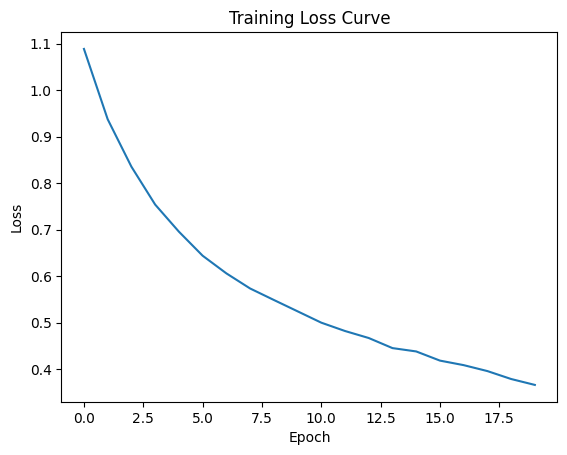

In [251]:
plt.plot(list(range(epochs)), history.history['loss'])
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

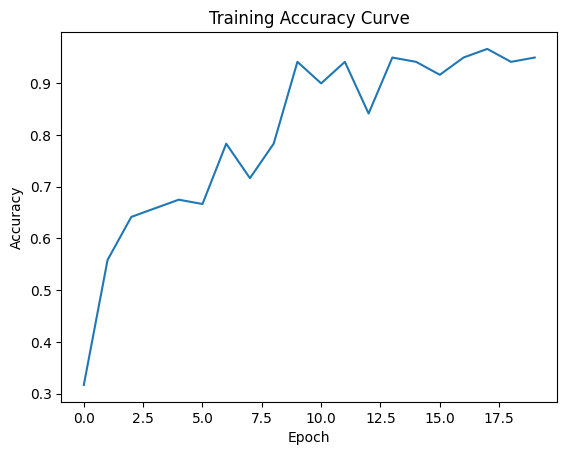

In [252]:
plt.plot(list(range(epochs)), history.history['accuracy'])
plt.title('Training Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()